Analyzing the continuous ratings from all performances 

In [1]:
import matplotlib.pyplot as plt 
%matplotlib inline 
import numpy as np 

import os 

In [2]:
listfiles = os.listdir('/home/nfarrugi/datasets/NautilisBrain/christopherocher/')
listnpz = []
for c in listfiles:
    if c[-3:] == 'npz':
        listnpz.append(os.path.join('/home/nfarrugi/datasets/NautilisBrain/christopherocher/',c))

In [3]:
listnpz

['/home/nfarrugi/datasets/NautilisBrain/christopherocher/caroleeg_sess4_2.npz',
 '/home/nfarrugi/datasets/NautilisBrain/christopherocher/caroleeg_sess4_1.npz',
 '/home/nfarrugi/datasets/NautilisBrain/christopherocher/caroleeg_sess4_3.npz',
 '/home/nfarrugi/datasets/NautilisBrain/christopherocher/caroleeg_sess3.npz',
 '/home/nfarrugi/datasets/NautilisBrain/christopherocher/caroleeg_sess2.npz']

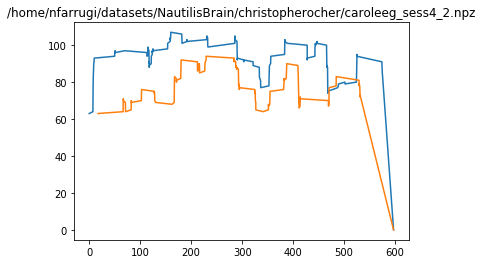

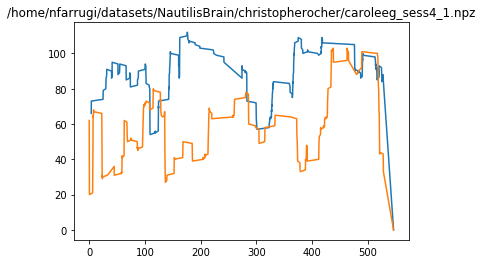

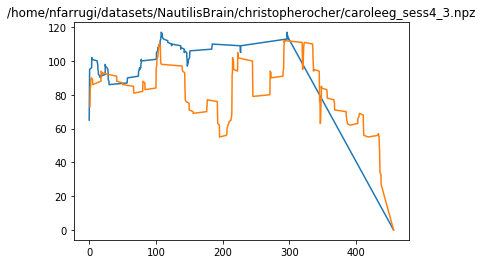

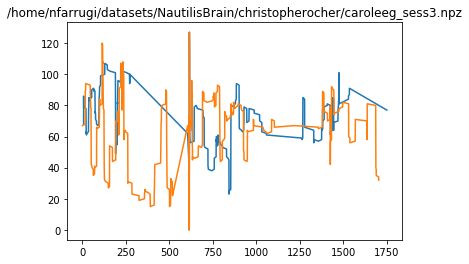

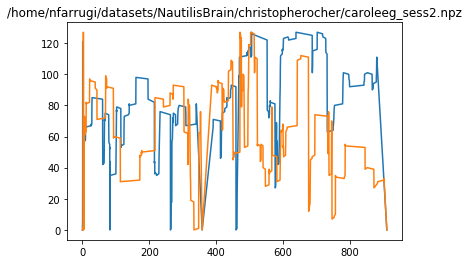

In [4]:
for curnpz in listnpz:
    focus = np.load(curnpz)['focus']
    subjtime = np.load(curnpz)['subjtime']
    plt.plot(focus[:,0],focus[:,1])
    plt.plot(subjtime[:,0],subjtime[:,1])
    plt.title(curnpz)
    plt.show()
    

Quantization

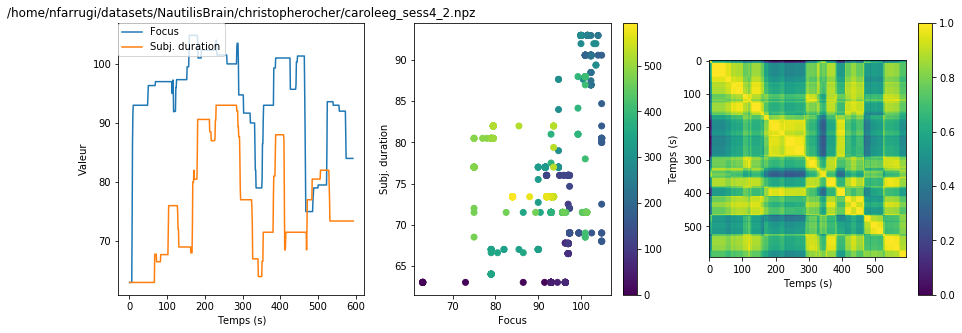

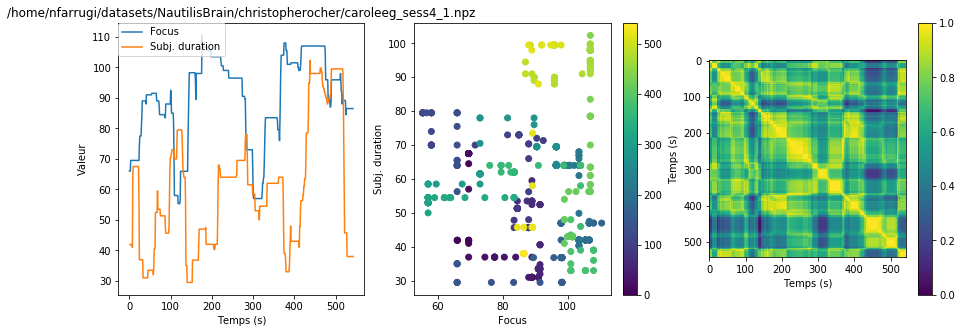

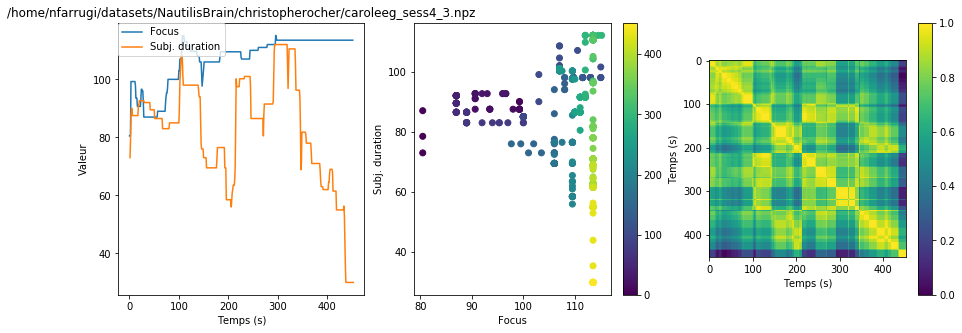

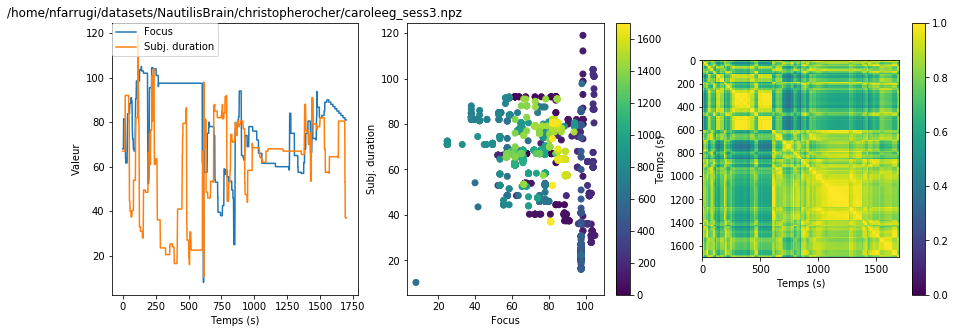

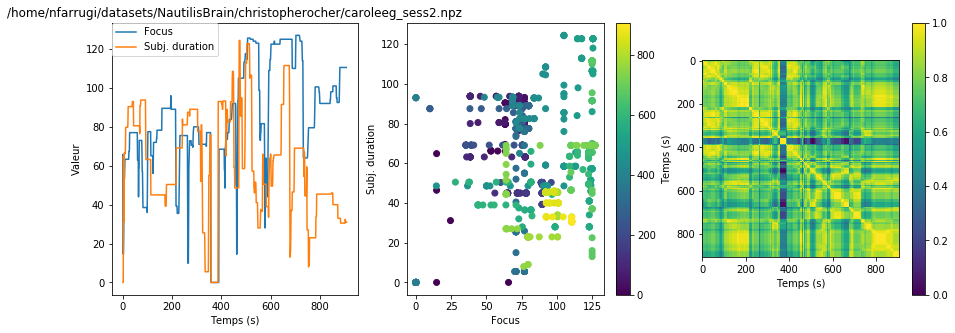

In [41]:
from analysis import quantize

from sklearn.metrics.pairwise import cosine_similarity,manhattan_distances,paired_manhattan_distances




addnoise = False  
for curnpz in listnpz:
    focus = np.load(curnpz)['focus']
    
    subjtime = np.load(curnpz)['subjtime']

    #Quantization
    focus_q = quantize(focus,res=1,delaytime=0) 
    subt_q = quantize(subjtime,res=1,delaytime=1)
    
    
    
    maxtime = min(focus_q.shape[0],subt_q.shape[0])
    
    if addnoise:
        focus_q[:maxtime,1] += np.random.rand(maxtime)
        subt_q[:maxtime,1] += np.random.rand(maxtime)
    
    X = np.stack([focus_q[:maxtime,1],subt_q[:maxtime,1]]).T
    S = manhattan_distances(X)

    
    
    plt.figure(figsize=(15,5))
    plt.subplot(1,3,1)
    plt.plot(focus_q[:maxtime,0],focus_q[:maxtime,1],label="Focus")
    plt.plot(subt_q[:maxtime,0],subt_q[:maxtime,1],label="Subj. duration")
    plt.ylabel('Valeur')
    plt.xlabel('Temps (s)')
    plt.legend(loc=2, borderaxespad=0.)
    plt.title(curnpz)
    
    plt.subplot(1,3,2)
    plt.scatter(focus_q[:maxtime,1],subt_q[:maxtime,1],c=np.arange(maxtime))
    plt.xlabel('Focus')
    plt.ylabel('Subj. duration')
    
    plt.colorbar()
    
    
    plt.subplot(1,3,3)
    
    plt.imshow((np.max(S)-S)/np.max(S))
    plt.xlabel('Temps (s)')
    plt.ylabel('Temps (s)')
    plt.colorbar()
    
    plt.show()
    
    


KMEANS
--

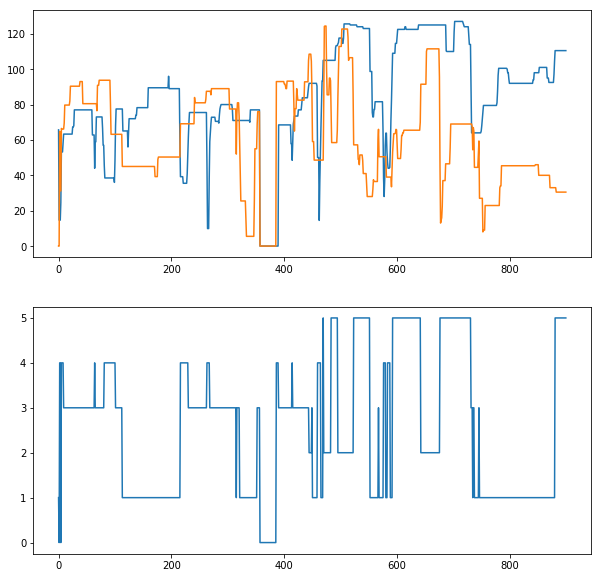

In [194]:
from sklearn.cluster import KMeans
mykmeans = KMeans(n_clusters=6)


mint = 0
maxt=900

X = np.stack([focus_q[mint:maxt,1],subt_q[mint:maxt,1]]).T

mykmeans.fit(X)

subjectivementalstates = mykmeans.labels_

plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(focus_q[mint:maxt,0],focus_q[mint:maxt,1])
plt.plot(subt_q[mint:maxt,0],subt_q[mint:maxt,1])
plt.subplot(2,1,2)
plt.plot(subt_q[mint:maxt,0],subjectivementalstates)


In [ ]:
plt.line([])

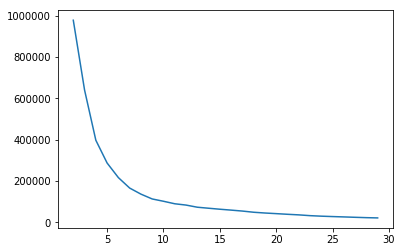

In [187]:
from sklearn.metrics import silhouette_score
inertia = []
sil = []


mint = 0
maxt=900
    
for nclust in range(2,30):
    mykmeans = KMeans(n_clusters=nclust)


    X = np.stack([focus_q[mint:maxt,1],subt_q[mint:maxt,1]]).T

    mykmeans.fit(X)

    sil.append(silhouette_score(X,mykmeans.labels_))
    inertia.append((mykmeans.inertia_))
    
    
plt.plot(range(2,30),inertia)

In [204]:
inputfile = 'caroleeg_sess2.wav'
labels_pred = subjectivementalstates
seglength = 1 
analysis_name = 'subjective_2'
resultpath = 'results_subjective'

write_clustered_segments(inputfile,labels_pred,seglength,analysis_name,resultpath,max_n_examples=20,shuffle_examples=False,concat_summary=True,save_indiv=True)




  0%|          | 0/20 [00:00<?, ?it/s]

Writing 20 examples for Cluster 0


  0%|          | 0/20 [00:00<?, ?it/s]

Writing 20 examples for Cluster 1


  0%|          | 0/20 [00:00<?, ?it/s]

Writing 20 examples for Cluster 2


 20%|██        | 4/20 [00:00<00:00, 34.84it/s]

Writing 20 examples for Cluster 3


 35%|███▌      | 7/20 [00:00<00:00, 35.70it/s]

Writing 20 examples for Cluster 4


  0%|          | 0/20 [00:00<?, ?it/s]

Writing 20 examples for Cluster 5


100%|██████████| 20/20 [00:16<00:00,  1.19it/s]
